In [1]:
import numpy as np # rename the library to np for convenience
import matplotlib.pyplot as plt # we want the "pyplot" module
import scipy.signal as sig

from IPython.display import Audio # listening to audio
from skimage import io # image i/o
from skimage import transform # image transformations
from scipy.io import wavfile # audio i/o

# allows plots to display in the notebook instead of another window
%matplotlib inline

In [428]:
phase = 0
x = np.linspace(0, 63, 128)
fs = 48000
freq = 262
phase_step = freq*((2**32)-1)/fs
print(phase_step)

sine_lut = (255/2)*np.sin(x/10)+(255/2)
saw_lut = (255/2)*sig.sawtooth(x/10)+(255/2)

# from http://www.datalyse.dk/datauk/examples.htm
piano_lut = 0.6*sine_lut + 0.3*(255/2)*np.sin(2*x/10)+(255/2)*0.3 + 0.15*(255/2)*np.sin(3*x/10)+(255/2)*0.15
piano_lut = piano_lut + 0.07*(255/2)*np.sin(4*x/10)+(255/2)*0.07
#piano_lut = piano_lut/122300

# from https://www.mathstudio.co.uk/pitch_perception.htm
violin_lut = sine_lut + 0.6*(255/2)*(np.sin(2*x/10)+np.sin(3*x/10)+np.sin(5*x/10))+(255/2)
violin_lut = violin_lut + 0.4*(255/2)*(np.sin(4*x/10)+np.sin(11*x/10))+(255/2)
violin_lut = violin_lut + 0.3*(255/2)*(np.sin(6*x/10)+np.sin(7*x/10))+(255/2)
violin_lut = violin_lut + 0.17*(255/2)*(np.sin(12*x/10)+np.sin(8*x/10)*np.sin(15*x/10))+(255/2)
violin_lut = violin_lut + 0.09*(255/2)*(np.sin(9*x/10)+np.sin(10*x/10)+np.sin(13*x/10)+np.sin(14*x/10))+(255/2)
violin_lut = violin_lut/4.42
# violins have too many resonant modes

#from http://large.stanford.edu/courses/2007/ph210/pelc2/
guitar_lut = (255/2)*(0.73*np.sin(x/10)+0.2*np.sin(3*x/10)+0.07*np.sin(5*x/10))+(255/2)

for i in range(len(sine_lut)):
    print("7'd",i, ": amp_out<=8'd",int(guitar_lut[i]))

23443363.151875
7'd 0 : amp_out<=8'd 127
7'd 1 : amp_out<=8'd 138
7'd 2 : amp_out<=8'd 148
7'd 3 : amp_out<=8'd 158
7'd 4 : amp_out<=8'd 167
7'd 5 : amp_out<=8'd 176
7'd 6 : amp_out<=8'd 183
7'd 7 : amp_out<=8'd 189
7'd 8 : amp_out<=8'd 195
7'd 9 : amp_out<=8'd 199
7'd 10 : amp_out<=8'd 202
7'd 11 : amp_out<=8'd 204
7'd 12 : amp_out<=8'd 206
7'd 13 : amp_out<=8'd 206
7'd 14 : amp_out<=8'd 206
7'd 15 : amp_out<=8'd 205
7'd 16 : amp_out<=8'd 204
7'd 17 : amp_out<=8'd 203
7'd 18 : amp_out<=8'd 202
7'd 19 : amp_out<=8'd 201
7'd 20 : amp_out<=8'd 200
7'd 21 : amp_out<=8'd 200
7'd 22 : amp_out<=8'd 200
7'd 23 : amp_out<=8'd 200
7'd 24 : amp_out<=8'd 200
7'd 25 : amp_out<=8'd 200
7'd 26 : amp_out<=8'd 201
7'd 27 : amp_out<=8'd 202
7'd 28 : amp_out<=8'd 202
7'd 29 : amp_out<=8'd 203
7'd 30 : amp_out<=8'd 203
7'd 31 : amp_out<=8'd 203
7'd 32 : amp_out<=8'd 203
7'd 33 : amp_out<=8'd 203
7'd 34 : amp_out<=8'd 203
7'd 35 : amp_out<=8'd 202
7'd 36 : amp_out<=8'd 202
7'd 37 : amp_out<=8'd 201
7'd 38

Text(0, 0.5, 'Amp')

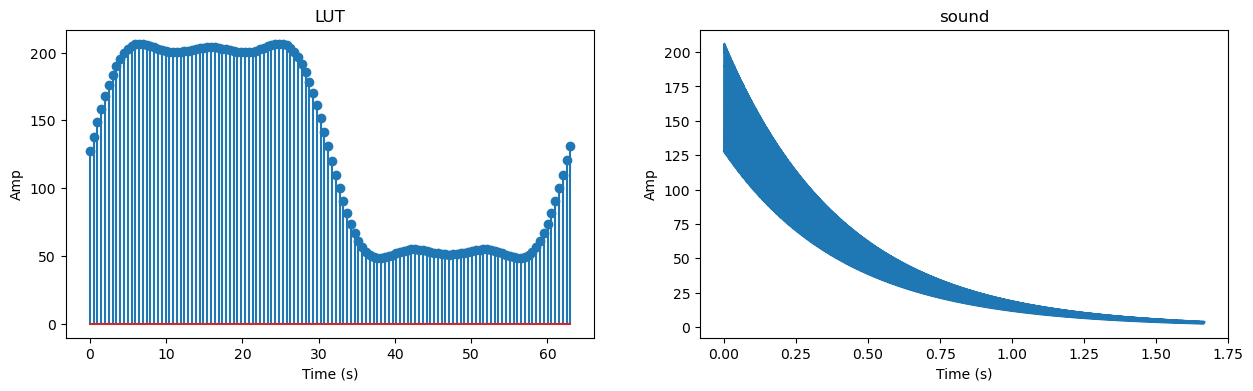

In [429]:
plt.figure(figsize = (15, 4))
plt.subplot(121)
plt.title("LUT")
plt.stem(x,guitar_lut)
plt.xlabel('Time (s)')
plt.ylabel('Amp')

freq = 220
phase_step = freq*((2**32)-1)/fs
sound = np.zeros(80000) # to play enough time to hear
dec = 1
for i in range (80000):
    phase = (phase + phase_step)%(2**32) # 32-bit phase
    phase_in = int((phase/(2**26))-1) # take top 6 bits
    #div = int(2**(0.00009*i))
    if i%16384 == 0:
        dec = dec*2
    sound[i] = guitar_lut[phase_in]*np.exp(-0.00005*i)  
    # for piano/plucked string sound, must implement exp decay (higher harmonics also needed)
    #sound[i] = piano_lut[phase_in]

# freq = 139.5 # C# 5
# phase_step = freq*((2**32)-1)/fs
# sound2 = np.zeros(80000)
# for i in range (80000):
#     phase = (phase + phase_step)%(2**32) # 32-bit phase
#     phase_in = int(phase/(2**26)) # take top 6 bits
#     sound2[i] = violin_lut[phase_in]*np.exp(-0.00005*i) 

# sound = sound+sound2

plt.subplot(122)
plt.title("sound")
plt.plot(np.linspace(0, len(sound)/fs, len(sound)), sound)
plt.xlabel('Time (s)')
plt.ylabel('Amp')

In [430]:
Audio(data=[sound,sound], rate=fs)